In [1]:
import qckt
from QSystems import *
from Job import Job

In [2]:
cnotckt = qckt.QCkt(2, 2)

cnotckt.H([0])
cnotckt.CX(0,1)
cnotckt.M([0,1],[0,1])

cnotckt.draw()

q000 -[H]-[.]-[M]-----
           |   |      
q001 -----[X]--|--[M]-
               |   |  
creg ==========v===v==
                      


In [3]:
qsimSvc().listInstances()

['qsim-eng', 'qsim-deb', 'nisqsim-eng', 'nisqsim-deb']


READ OUT STATE VECTOR: 
None
READ OUT CREGISTER: 00


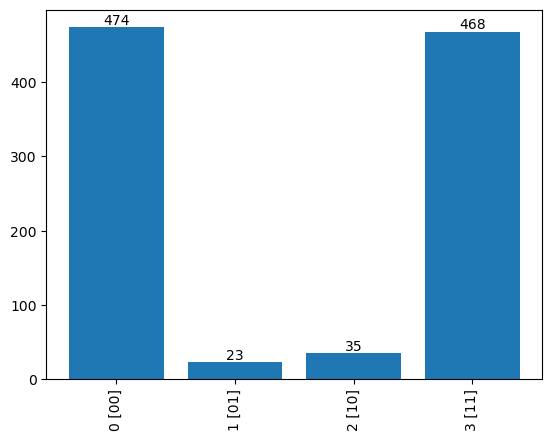

In [4]:
noise_profile = {'profile_id':'BitFlip', 'p1':0.05}
job = Job(cnotckt, noise_profile=noise_profile, shots=1000)
bk = qsimSvc().getInstance('nisqsim-eng')
bk.runjob(job)
print()
print("READ OUT STATE VECTOR: ")
print(job.get_svec())
print("READ OUT CREGISTER: ", end="")
print( job.get_creg()[0])
job.plot_counts()
print()